# Performance Analysis
**by Jonas Drotleff and Noah Wach**

All our agents save important performance measures such as **rewards** and
e.g. the **number of coins** collected each round in a numpy array. In this
notebook, we analyze the performance of our agents.

In [15]:
%config InlineBackend.figure_format = "retina"
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [16]:
def rolling_average(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, "same")

In [17]:
pdf_dpi = 2 * 72

## `coin_agent`

First we need to load and extract the data.

In [29]:
rewards_coin_agent = np.load("agent_code/coin_agent/rewards.npy")
performance_coin_agent = np.load("agent_code/coin_agent/performance.npy")

In [30]:
generation = np.arange(rewards_coin_agent.shape[0]) + 1

In [31]:
window_size = 10
mean_reward =  rewards_coin_agent[:, 0]
reward_average = rolling_average(mean_reward, window_size)

median_reward =  rewards_coin_agent[:, 1]
reward_std =  rewards_coin_agent[:, 2]
sum_reward =  rewards_coin_agent[:, 3]

In [32]:
steps_survived, coins_collected = performance_coin_agent.T

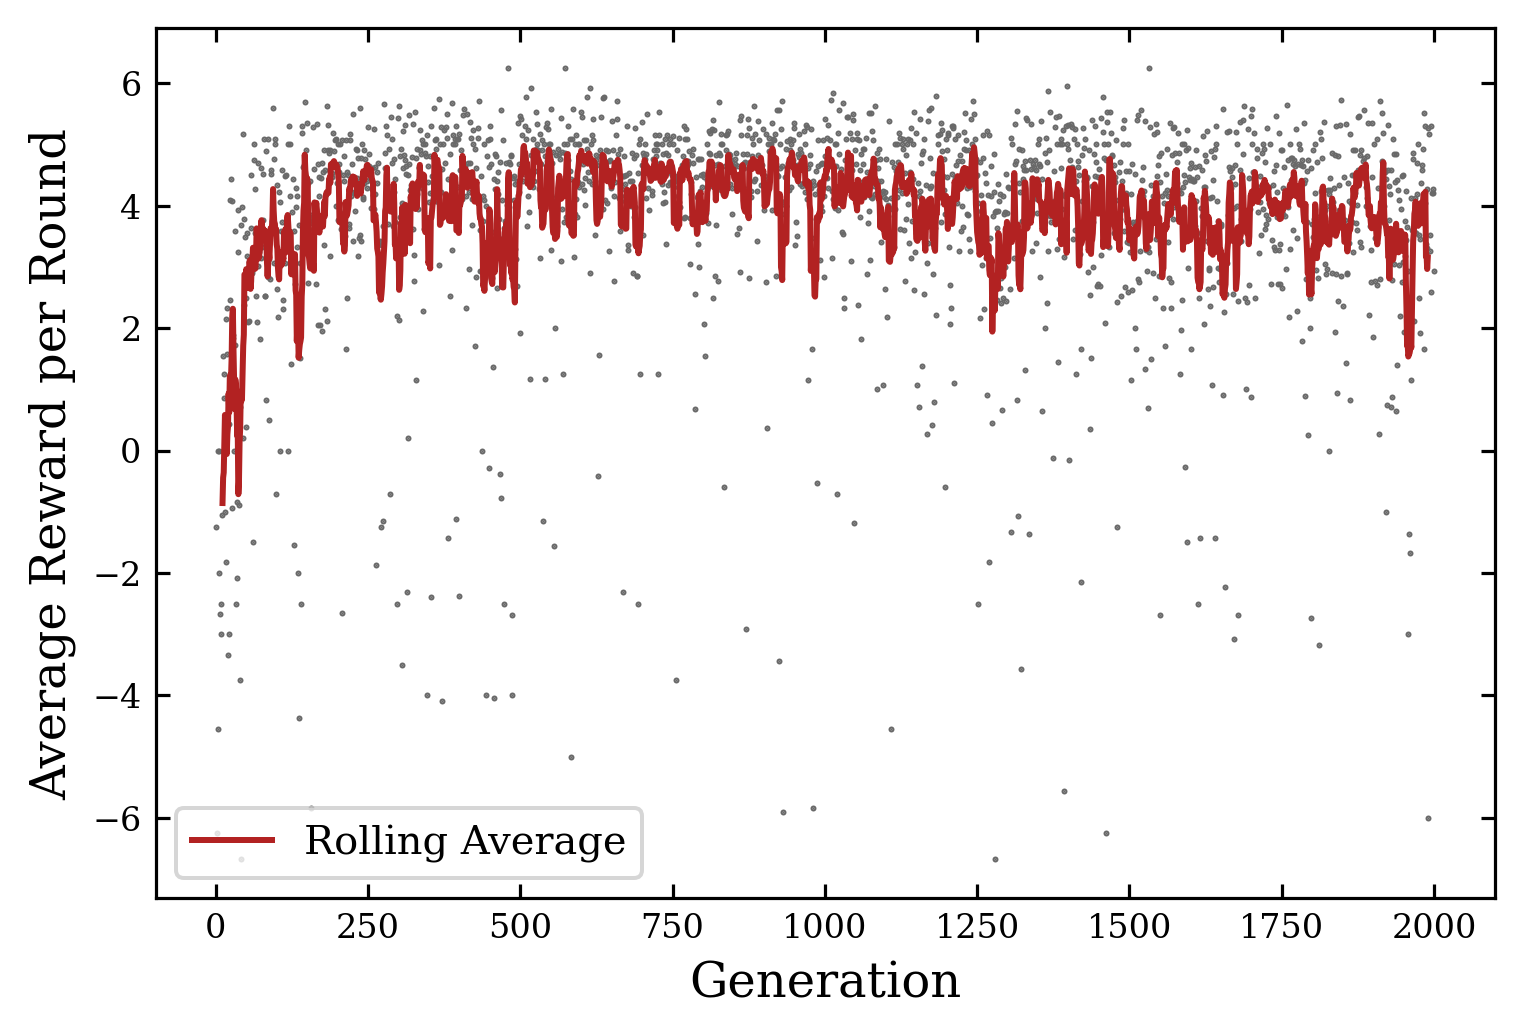

In [33]:
fig, ax = plt.subplots(dpi=pdf_dpi)

ax.set_xlabel("Generation")
ax.set_ylabel("Average Reward per Round")

ax.plot(generation, mean_reward, ".", markersize=1, color="dimgray", rasterized=True)
ax.plot(
    generation[window_size:-window_size],
    reward_average[window_size:-window_size],
    label="Rolling Average", color="firebrick"
)
ax.legend()
plt.savefig("figs/coin_agent_rewards.pdf", bbox_inches='tight', dpi=pdf_dpi)

**Additional performance metrics:**

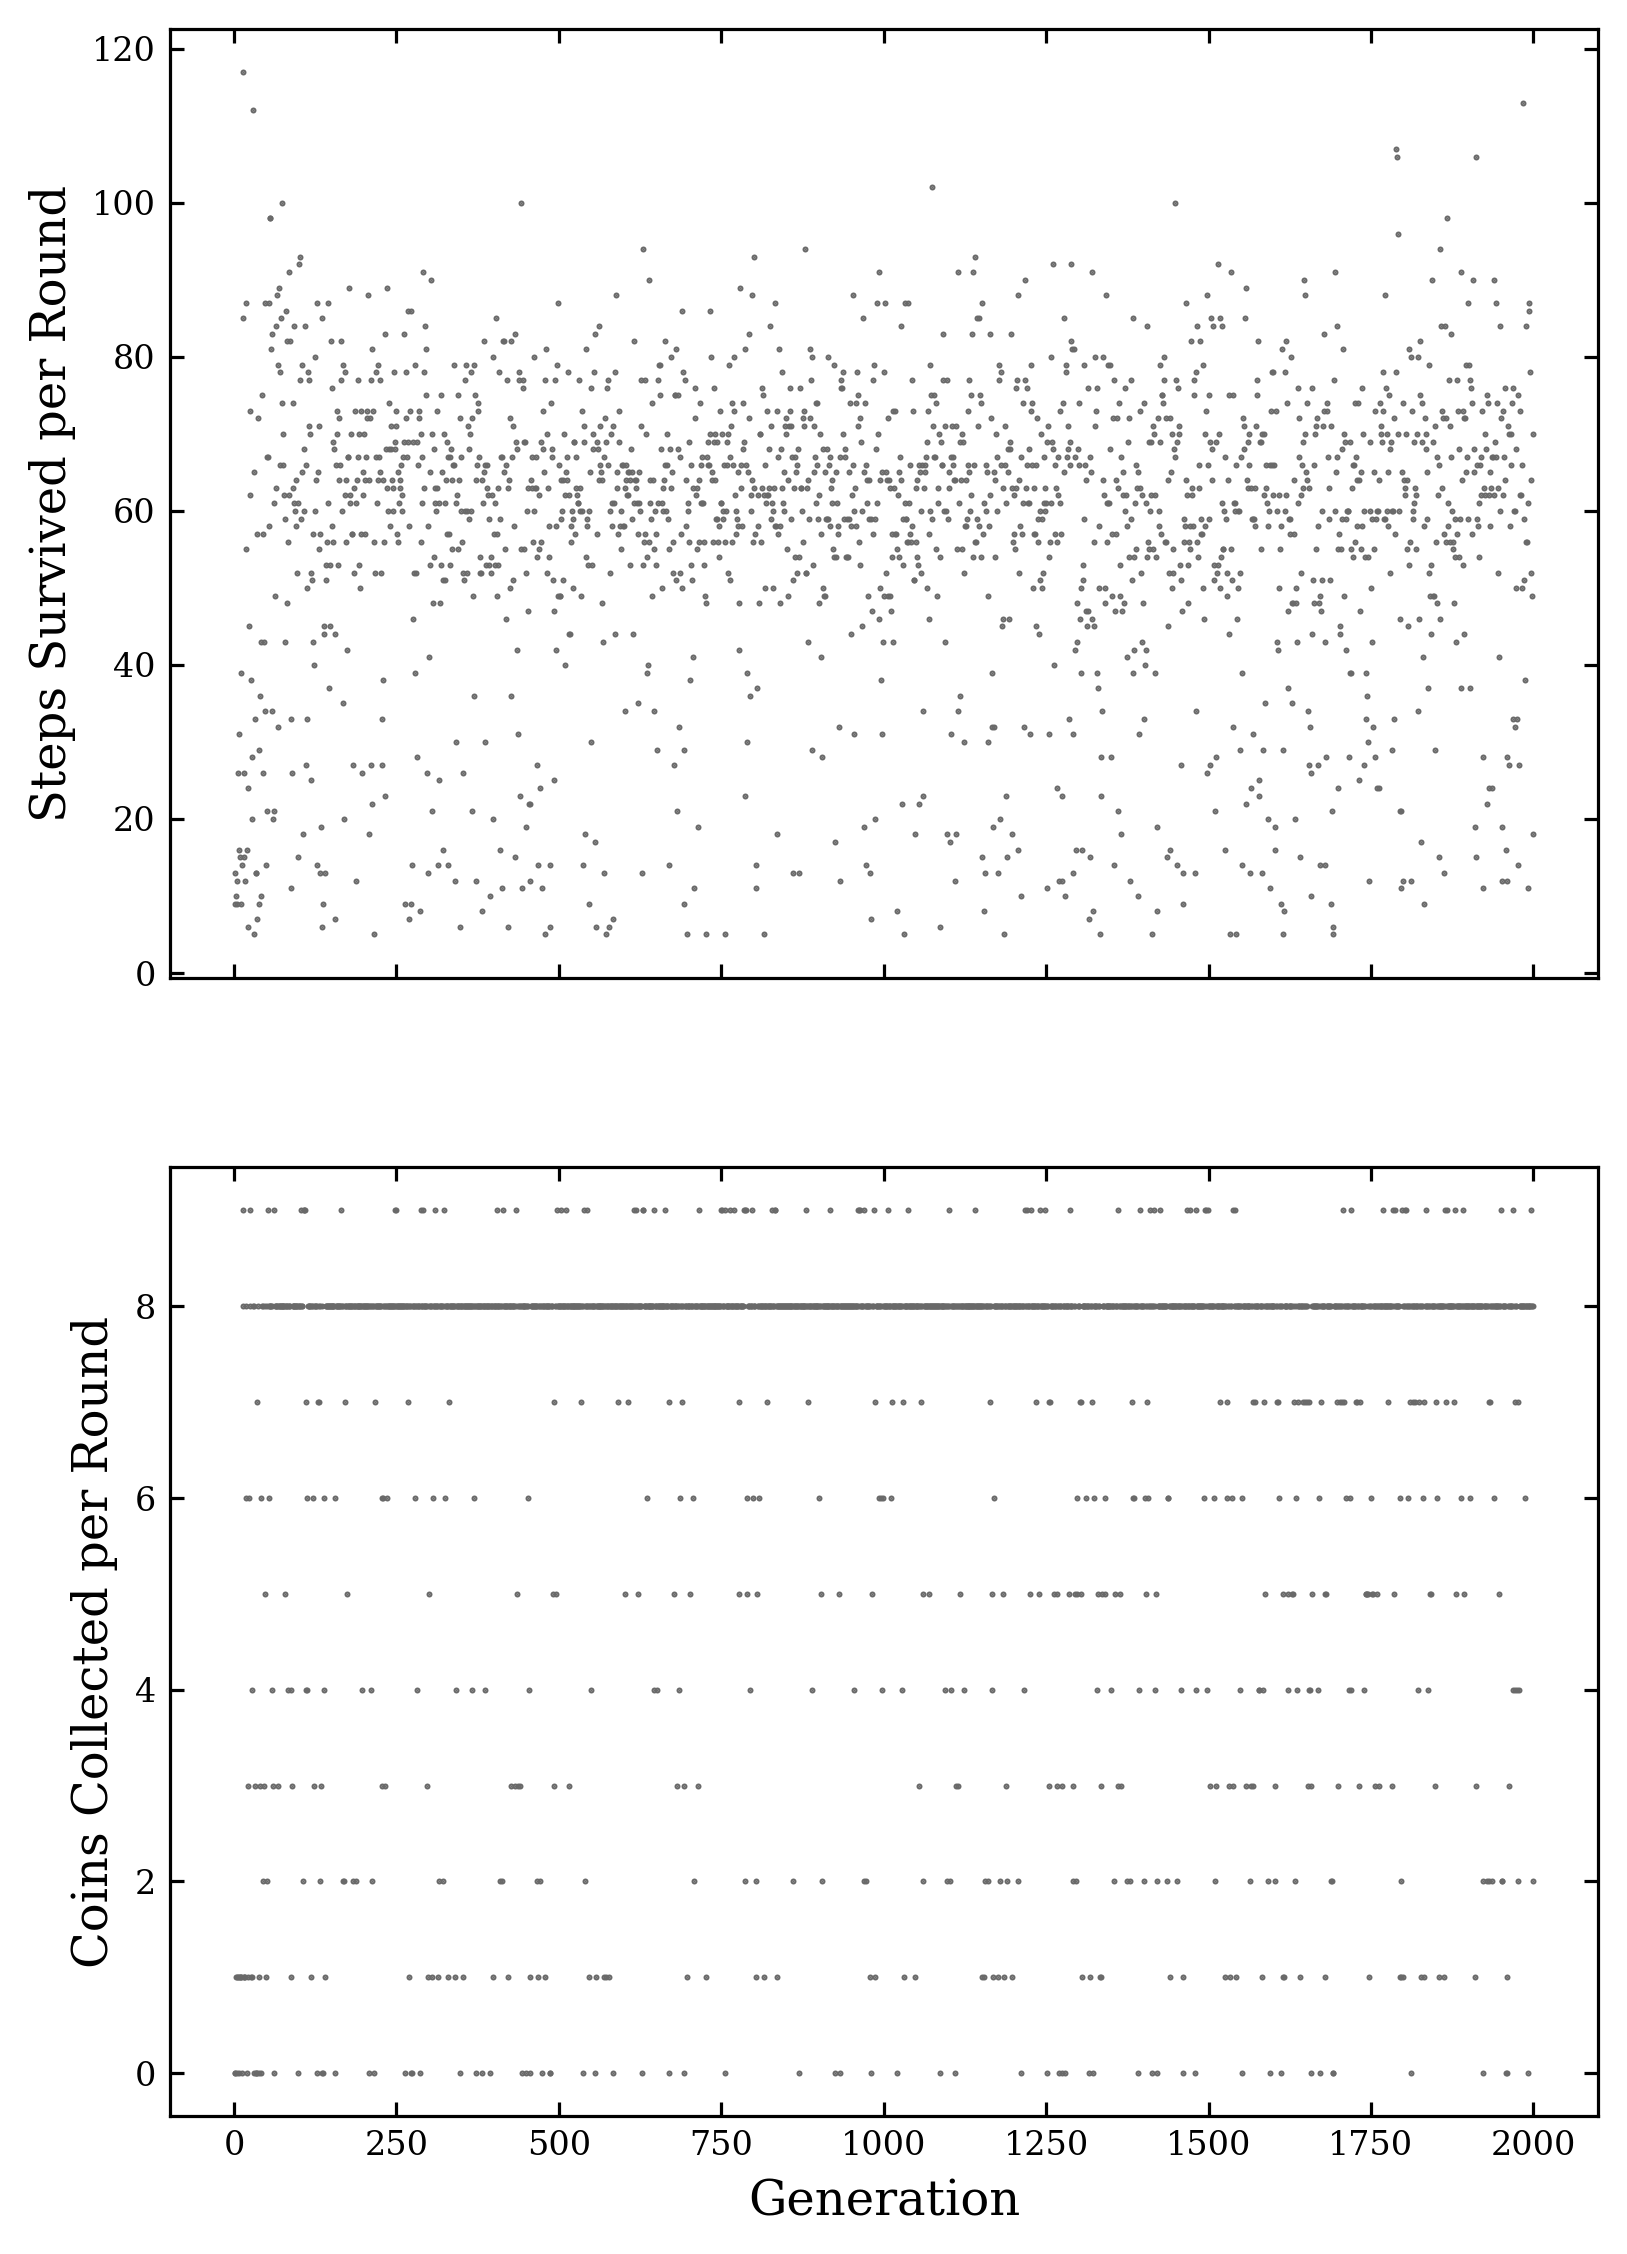

In [34]:
fig, ax = plt.subplots(nrows=2, figsize=(1 * 6.4, 2 * 4.8), dpi=pdf_dpi, sharex=True)

ax[1].set_xlabel("Generation")
ax[0].set_ylabel("Steps Survived per Round")
ax[1].set_ylabel("Coins Collected per Round")

ax[0].plot(generation, steps_survived, ".", markersize=1, color="dimgray", rasterized=True)
ax[1].plot(generation, coins_collected, ".", markersize=1, color="dimgray", rasterized=True)

plt.savefig("figs/coin_agent_performance.pdf", bbox_inches='tight', dpi=pdf_dpi)

## `strong_agent`

In [35]:
performance = np.load("agent_code/strong_agent/performance.npy")
reward = np.load("agent_code/strong_agent/scores.npy")[:, 0]

x_performance = np.arange(performance.shape[0])+1
x_reward = np.arange(reward.shape[0])+1

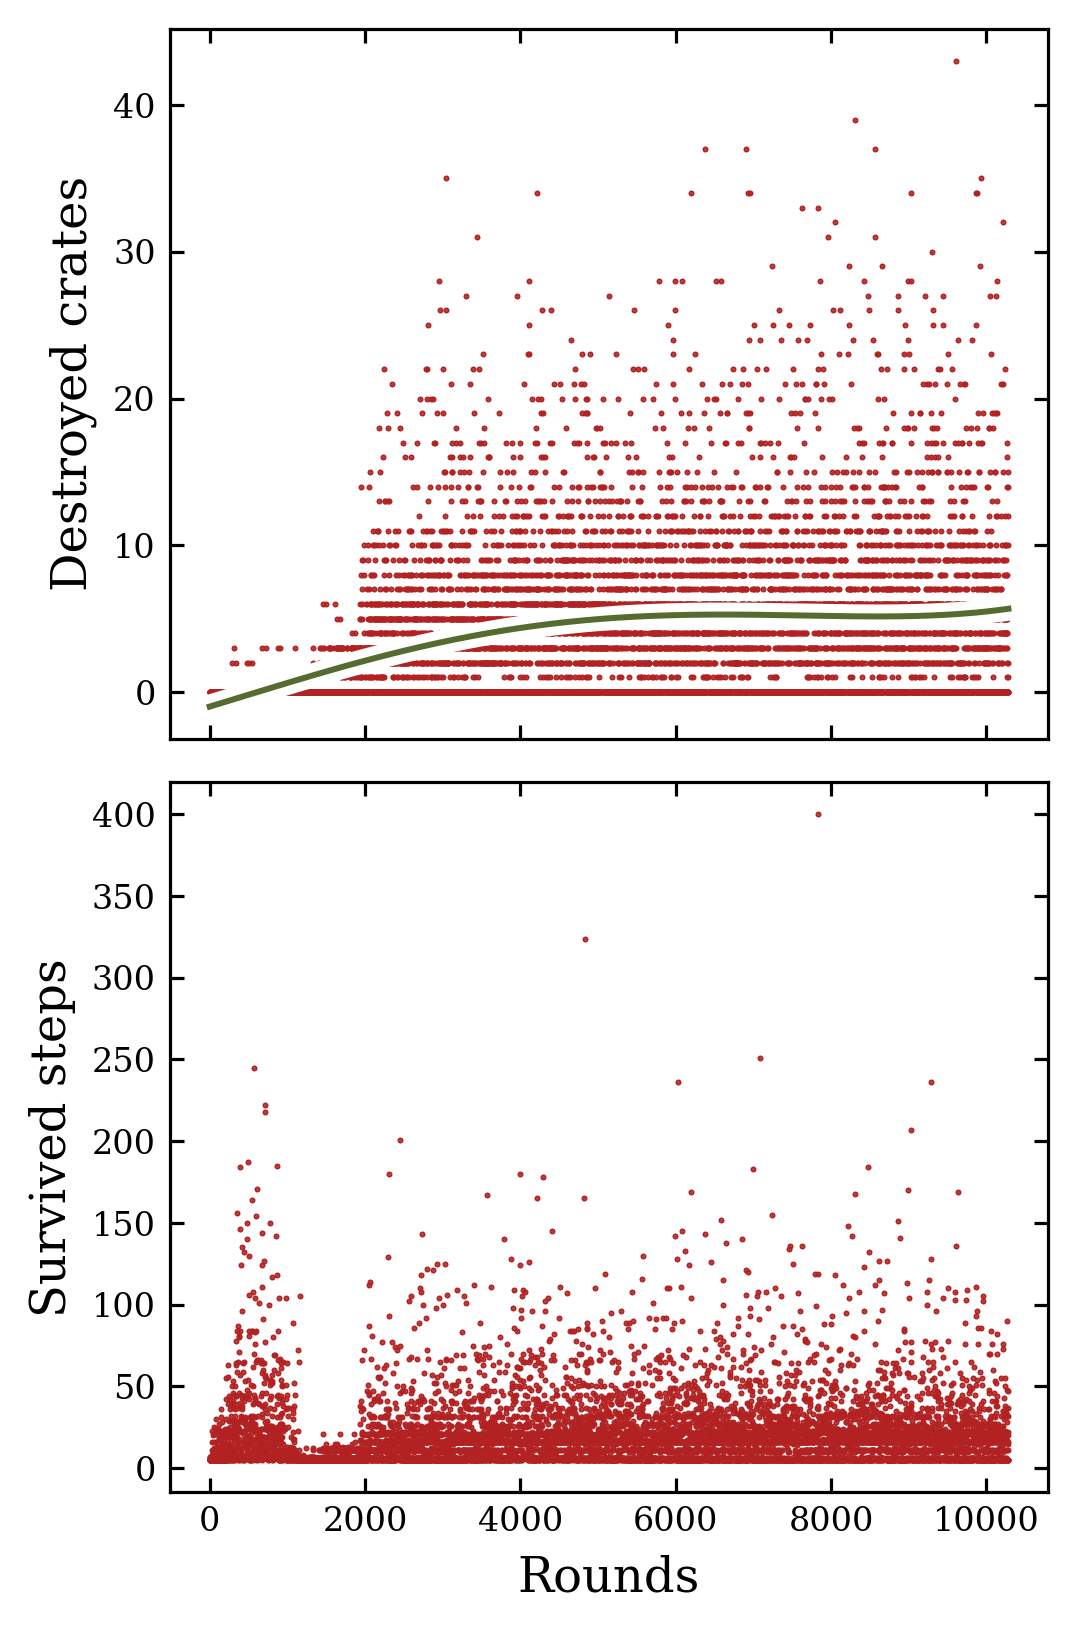

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(0.6 * 6.4, 2 * 0.6 * 4.8), dpi=pdf_dpi, sharex=True, tight_layout=True)
# fig.subplots_adjust(left=-0.1)

axs[0].plot(x_performance, performance[:, 0], ".", markersize=1, color="firebrick", rasterized=True)
axs[0].set_ylabel("Destroyed crates")


axs[1].plot(x_performance, performance[:, 2], ".", markersize=1, color="firebrick", rasterized=True)
axs[1].set_ylabel("Survived steps")
axs[1].set_xlabel("Rounds")

z = np.polyfit(x_performance, performance[:, 0], 4)
p = np.poly1d(z)
axs[0].plot(x_performance, p(x_performance), "white", linewidth=6)
axs[0].plot(x_performance, p(x_performance), "darkolivegreen")

plt.savefig("figs/strong_agent_performance_1.pdf", bbox_inches='tight', dpi=pdf_dpi)

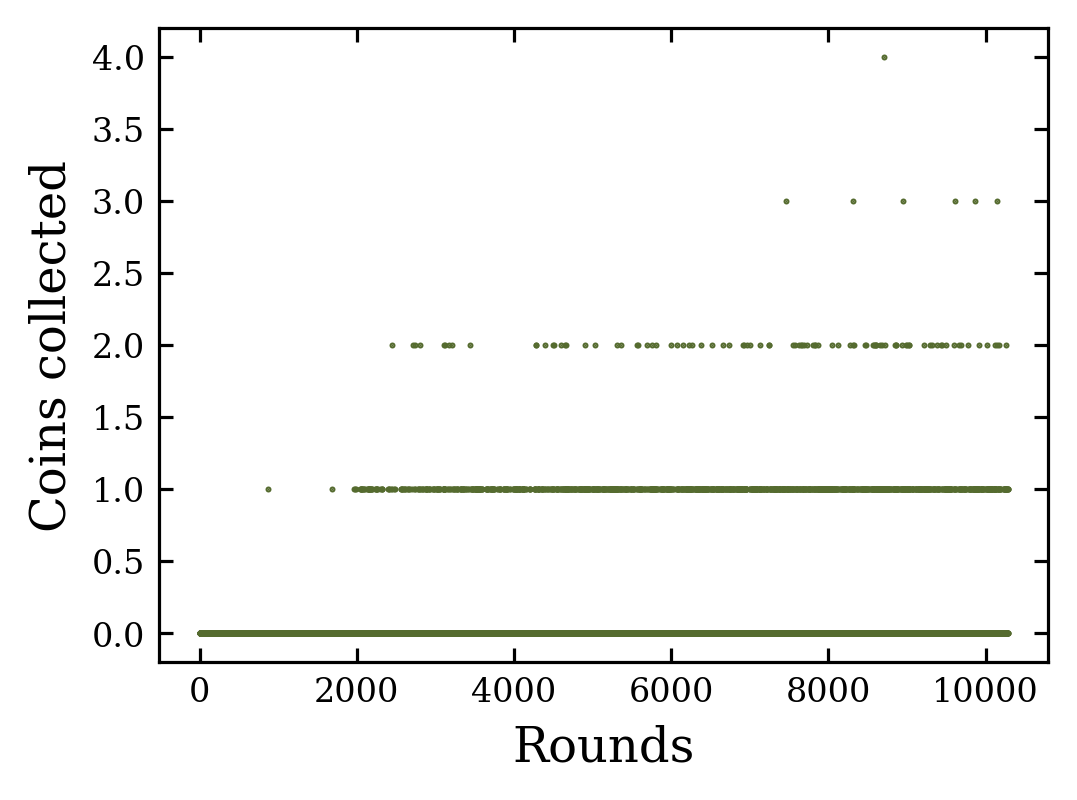

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(0.6 * 6.4, 0.6 * 4.8), dpi=pdf_dpi, tight_layout=True)

ax.plot(x_performance, performance[:, 1], ".", markersize=1, color="darkolivegreen", rasterized=True)
# ax.set_title("Survived steps per round")
ax.set_ylabel("Coins collected")
ax.set_xlabel("Rounds")

plt.savefig("figs/strong_agent_performance_2.pdf", bbox_inches='tight', dpi=pdf_dpi)

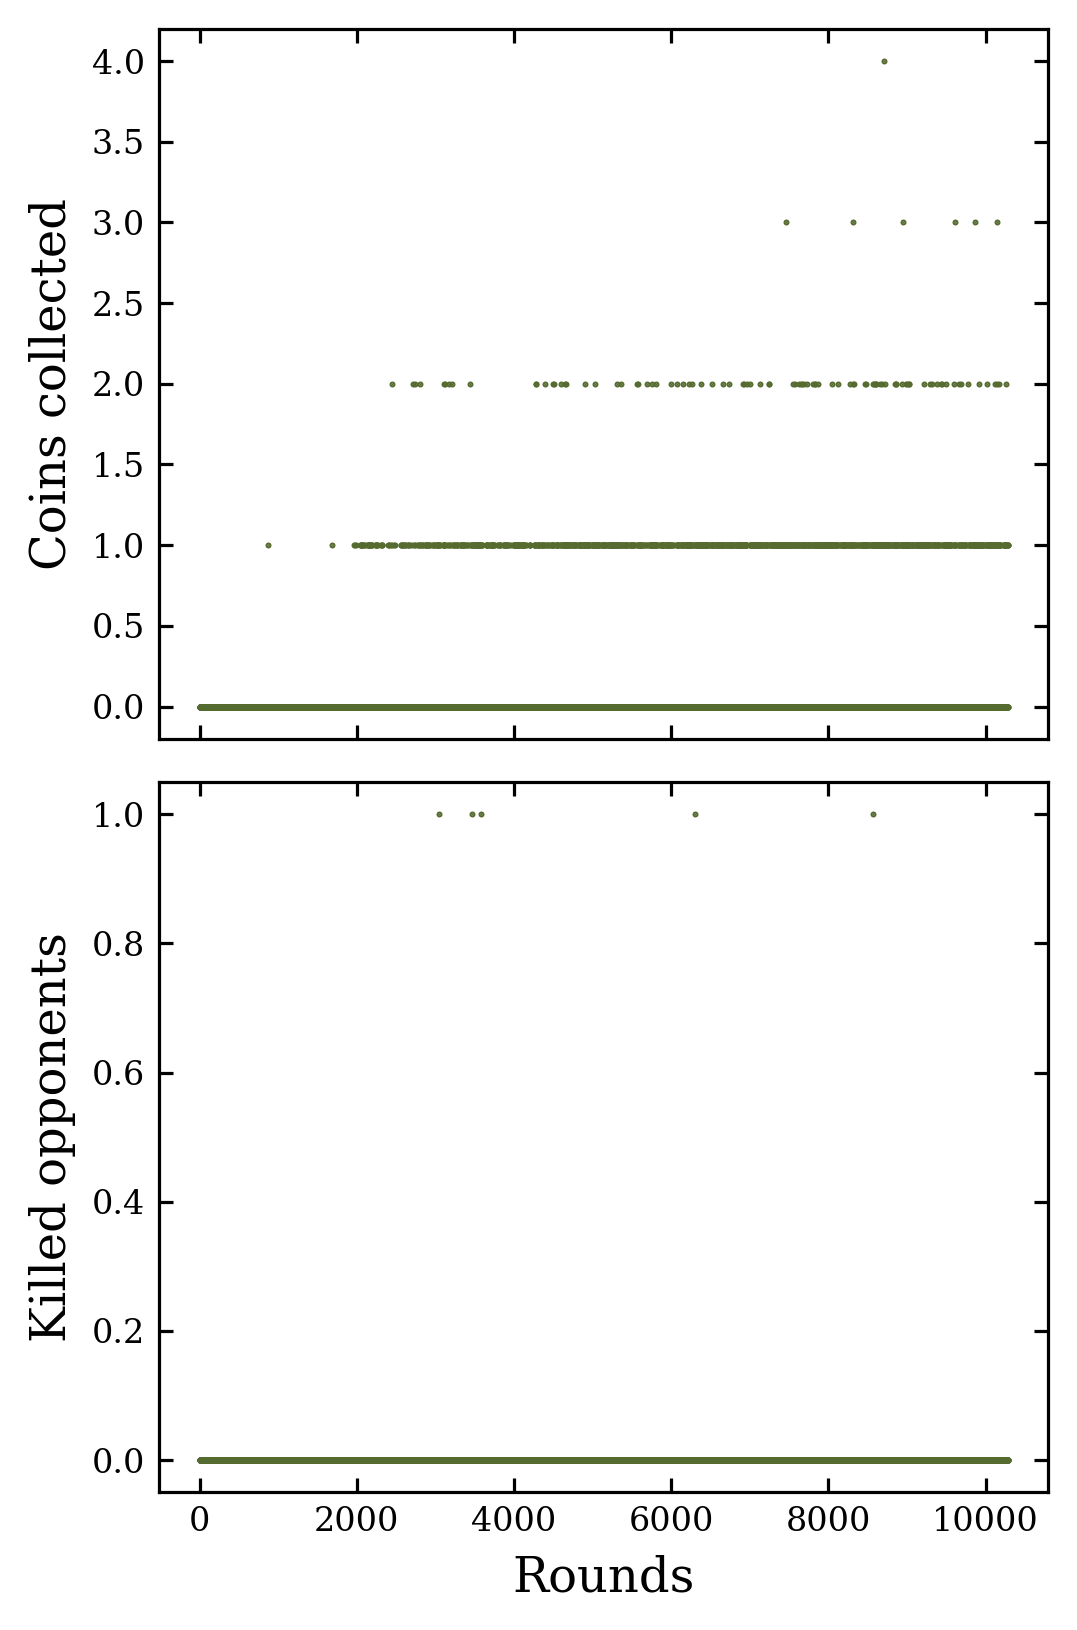

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(0.6 * 6.4, 2 * 0.6 * 4.8), dpi=pdf_dpi, sharex=True, tight_layout=True)

axs[0].plot(x_performance, performance[:, 1], ".", markersize=1, color="darkolivegreen", rasterized=True)
# axs[0].set_title("Survived steps per round")
axs[0].set_ylabel("Coins collected")
# axs[0].set_xlabel("Rounds")


axs[1].plot(x_performance, performance[:, 3], ".", markersize=1, color="darkolivegreen", rasterized=True)
# axs[1].set_title("Killed opponents per round")
axs[1].set_ylabel("Killed opponents")
axs[1].set_xlabel("Rounds")

plt.savefig("figs/strong_agent_performance_3.pdf", bbox_inches='tight', dpi=pdf_dpi)

### Rewards

<IPython.core.display.Latex object>

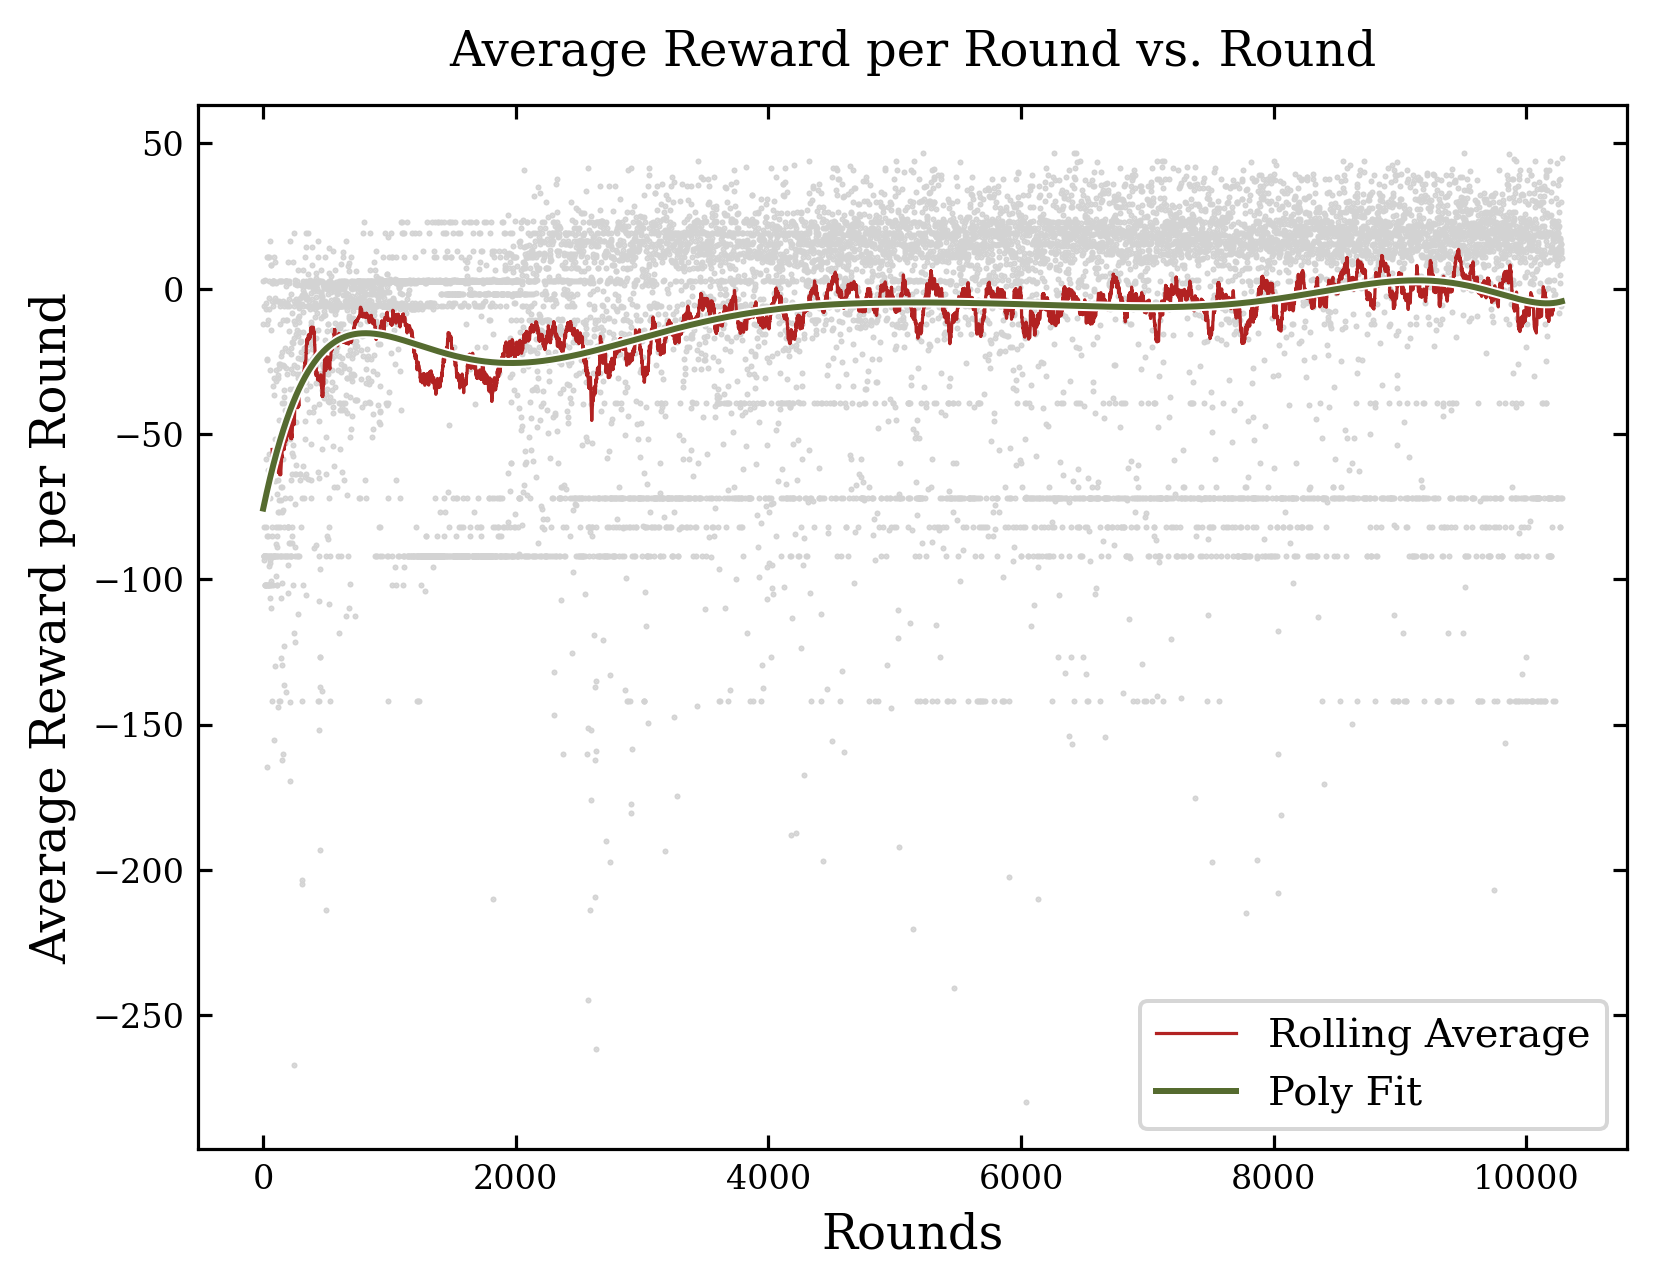

In [39]:
window_size = 70
last_steps = 200
reward_average = rolling_average(reward, window_size)

display(Latex(
    f"Mean reward over the last ${last_steps}$ steps:"
    f" ${reward[-last_steps:].mean():.2f}$"
))

fig, ax = plt.subplots(1, 1, figsize=(1 * 6.4, 1 * 4.8), dpi=pdf_dpi)

ax.set_title("Average Reward per Round vs. Round")
ax.set_xlabel("Rounds")
ax.set_ylabel("Average Reward per Round")

ax.plot(x_reward, reward, ".", markersize=1, color="lightgray", rasterized=True)
ax.plot(
    x_reward[window_size:-window_size],
    reward_average[window_size:-window_size],
    label="Rolling Average",
    linewidth=.8,
    color="firebrick"
)

z = np.polyfit(x_reward, reward, 10)
p = np.poly1d(z)
ax.plot(x_reward,p(x_reward), "white", linewidth=2.5)
ax.plot(x_reward,p(x_reward), "darkolivegreen", label="Poly Fit")
ax.legend()

plt.savefig("figs/strong_agent_rewards.pdf", bbox_inches='tight', dpi=pdf_dpi)